# Exploratory Data Analysis

In this step, we explore the raw data. The goal is to examine column names, data types, row counts, and missing values to understand the structure of the dataset and plan the necessary modeling and cleaning steps.

## Necessary imports

In [1]:
import pandas as pd      
import numpy as np       
import matplotlib.pyplot as plt  
import seaborn as sns    
from pathlib import Path


In [2]:
data_path = Path("../data_raw")

## Load datasets
Loading the necessary tables: orders, order_items, customers, products, translations & payments

In [3]:
df_orders = pd.read_csv(data_path/"olist_orders_dataset.csv")
df_order_items = pd.read_csv(data_path/"olist_order_items_dataset.csv")
df_customers = pd.read_csv(data_path/"olist_customers_dataset.csv")
df_products = pd.read_csv(data_path/"olist_products_dataset.csv")
df_translations = pd.read_csv(data_path/"product_category_name_translation.csv")
df_payments = pd.read_csv(data_path/"olist_order_payments_dataset.csv")

## Orders dataset

Each row represents an order with details such as order status, purchase timestamp, approval time, shipping limit, and delivery date.

In [4]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
df_orders.info()
df_orders.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

## Customers dataset

This dataset provides customer information.  
It contains a unique customer ID, customer unique identifier, postal code prefix, city, and state.

In [6]:
df_customers.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
df_customers.info()
df_customers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

## Products dataset

This dataset contains information about products.  
It includes product category, name, description length, and physical characteristics such as weight and dimensions.

In [8]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [9]:
df_products.info()
df_products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

## Product category translation

This file maps product categories from Portuguese to English.  
It will be useful when analyzing and presenting the results in dashboards.

In [10]:
df_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
df_translations.info()
df_translations.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

## Order items dataset

This dataset contains the details of individual order items.  
It links orders to products and sellers and includes information such as price, freight value, and shipping dates.

In [12]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
df_order_items.info()
df_order_items.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

## Payments dataset

This dataset contains information about the payment for each order.  
It includes payment type, number of installments, and payment value.

In [14]:
df_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
df_payments.info()
df_payments.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

## Summary of missing values

Orders: Missing delivery dates -> Possibly canceled or non delivered orders.

Products: Missing category and descriptions -> Possibly incomplete info from sellers.

These will be handled during SQL modeling.


--- 

## Dataset sizes and unique keys 

In [16]:
row_counts  = pd.DataFrame({
    "Table": ["Orders", "Customers", "Products", "Order items","Translations", "Payments"],
    "Rows":[
        len(df_orders),
        len(df_customers),
        len(df_products),
        len(df_order_items),
        len(df_translations),
        len(df_payments)
    ]
})

row_counts

,Table,Rows
0,Orders,99441
1,Customers,99441
2,Products,32951
3,Order items,112650
4,Translations,71
5,Payments,103886


In [17]:
row_duplicates  = pd.DataFrame({
    "Table": ["Orders", "Customers", "Products", "Order items","Translations", "Payments"],
    "Duplicate rows":[
        df_orders.duplicated().sum(),
        df_customers.duplicated().sum(),
        df_products.duplicated().sum(),
        df_order_items.duplicated().sum(),
        df_translations.duplicated().sum(),
        df_payments.duplicated().sum()
    ]
})

row_duplicates

,Table,Duplicate rows
0,Orders,0
1,Customers,0
2,Products,0
3,Order items,0
4,Translations,0
5,Payments,0


In [18]:
Duplicate_keys = pd.DataFrame({
    "Table": ["Orders", "Customers", "Products", "Order items","Translations", "Payments"],
    "Duplicate keys":[
        df_orders.duplicated(subset=["order_id"]).sum(),
        df_customers.duplicated(subset=["customer_id"]).sum(),
        df_products.duplicated(subset=["product_id"]).sum(),
        df_order_items.duplicated(subset=["order_id", "order_item_id"]).sum(),
        df_translations.duplicated(subset=["product_category_name"]).sum(),
        df_payments.duplicated(subset=["order_id","payment_sequential"]).sum()
    ]

}) 

Duplicate_keys

,Table,Duplicate keys
0,Orders,0
1,Customers,0
2,Products,0
3,Order items,0
4,Translations,0
5,Payments,0


---

## Orders analysis

In [19]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

In [20]:
df_orders['order_status'].value_counts(dropna=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [21]:
df_orders['order_status'].value_counts(normalize=True).round(3)  

order_status
delivered      0.970
shipped        0.011
canceled       0.006
unavailable    0.006
invoiced       0.003
processing     0.003
created        0.000
approved       0.000
Name: proportion, dtype: float64

In [22]:
df_orders['order_purchase_timestamp'].min(), df_orders['order_purchase_timestamp'].max()

(Timestamp('2016-09-04 21:15:19'), Timestamp('2018-10-17 17:30:18'))

In [23]:
df_orders.set_index('order_purchase_timestamp').resample('M')['order_id'].count()

order_purchase_timestamp
2016-09-30       4
2016-10-31     324
2016-11-30       0
2016-12-31       1
2017-01-31     800
2017-02-28    1780
2017-03-31    2682
2017-04-30    2404
2017-05-31    3700
2017-06-30    3245
2017-07-31    4026
2017-08-31    4331
2017-09-30    4285
2017-10-31    4631
2017-11-30    7544
2017-12-31    5673
2018-01-31    7269
2018-02-28    6728
2018-03-31    7211
2018-04-30    6939
2018-05-31    6873
2018-06-30    6167
2018-07-31    6292
2018-08-31    6512
2018-09-30      16
2018-10-31       4
Freq: M, Name: order_id, dtype: int64

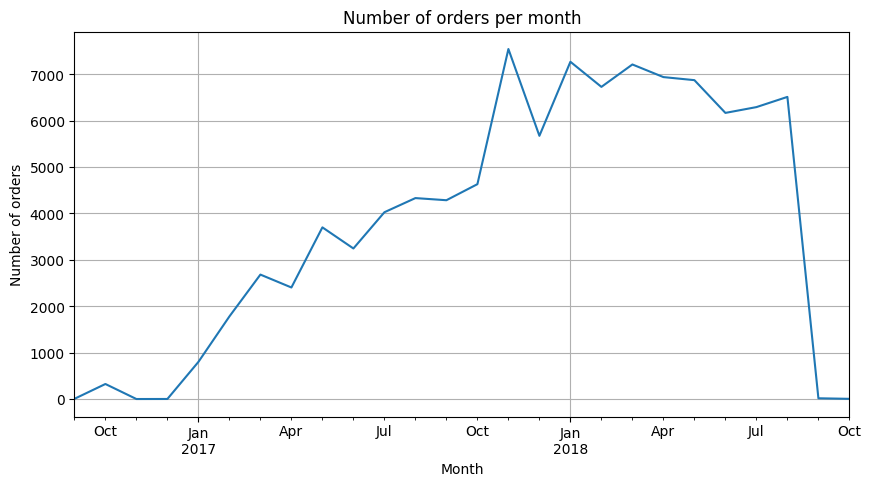

In [24]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])

monthly_orders = df_orders.set_index('order_purchase_timestamp').resample('M')['order_id'].count()

plt.figure(figsize=(10,5))
monthly_orders.plot()
plt.title("Number of orders per month")
plt.xlabel("Month")
plt.ylabel("Number of orders")
plt.grid(True)
plt.show()


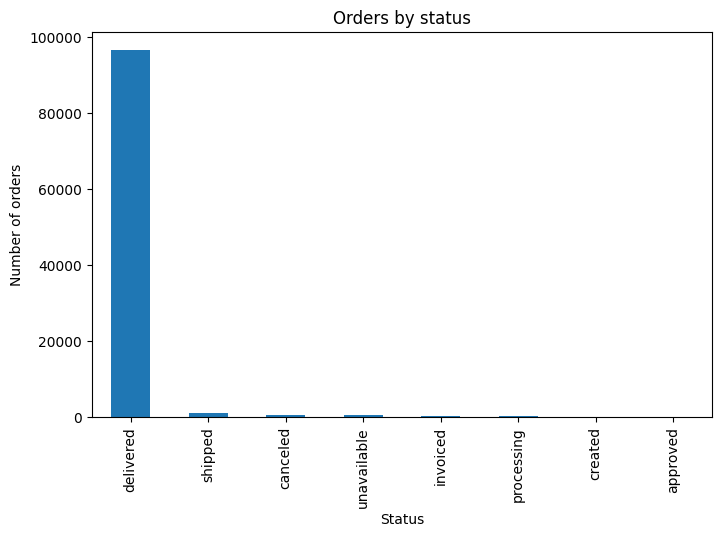

In [25]:
status_counts = df_orders['order_status'].value_counts()

plt.figure(figsize=(8,5))
status_counts.plot(kind='bar')
plt.title("Orders by status")
plt.xlabel("Status")
plt.ylabel("Number of orders")
plt.show()

**Summary (Orders):**  
- Dataset covers September 2016 - October 2018
- 97% of orders were succesfully delivered, ~1% shipped but not delivered, and ~0.6% canceled.  
- Monthly order volume increased steadily during 2017, then stabilized in 2018.  



## Payments analysis

In [26]:
df_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [27]:
df_payments['payment_type'].value_counts(normalize=True).round(3) 

payment_type
credit_card    0.739
boleto         0.190
voucher        0.056
debit_card     0.015
not_defined    0.000
Name: proportion, dtype: float64

In [28]:
df_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

In [29]:
df_payments['payment_installments'].value_counts().sort_index()

payment_installments
0         2
1     52546
2     12413
3     10461
4      7098
5      5239
6      3920
7      1626
8      4268
9       644
10     5328
11       23
12      133
13       16
14       15
15       74
16        5
17        8
18       27
20       17
21        3
22        1
23        1
24       18
Name: count, dtype: int64

In [30]:
df_payments.groupby('order_id')['payment_value'].sum().describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

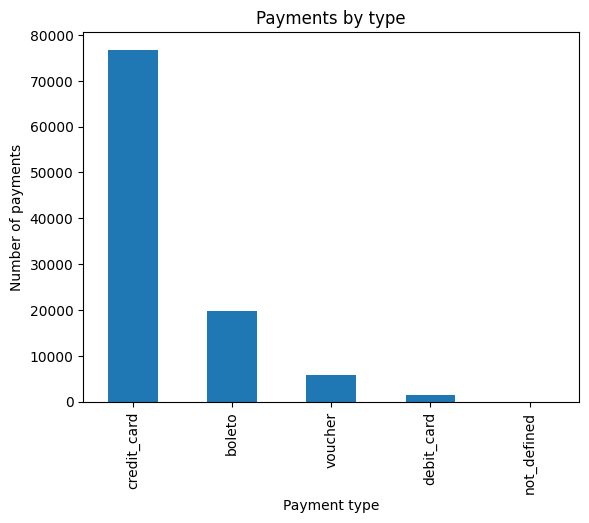

In [31]:
payment_type_counts = df_payments['payment_type'].value_counts()

payment_type_counts.plot(kind='bar')
plt.title("Payments by type")
plt.xlabel("Payment type")
plt.ylabel("Number of payments")
plt.show()

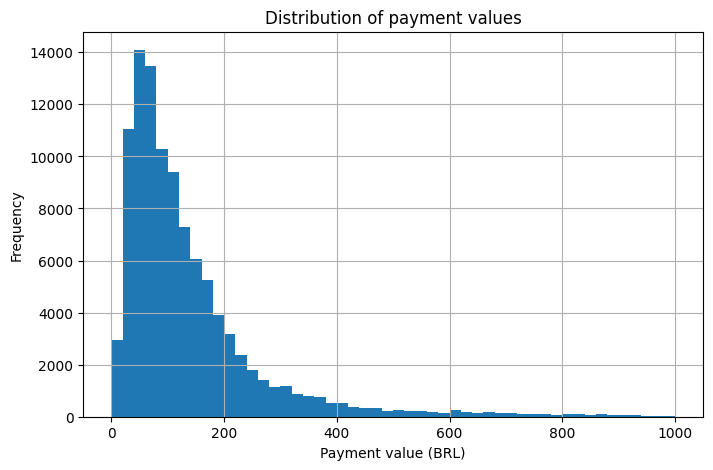

In [32]:
plt.figure(figsize=(8,5))
df_payments['payment_value'].hist(bins=50, range=(0,1000))
plt.title("Distribution of payment values")
plt.xlabel("Payment value (BRL)")
plt.ylabel("Frequency")
plt.show()


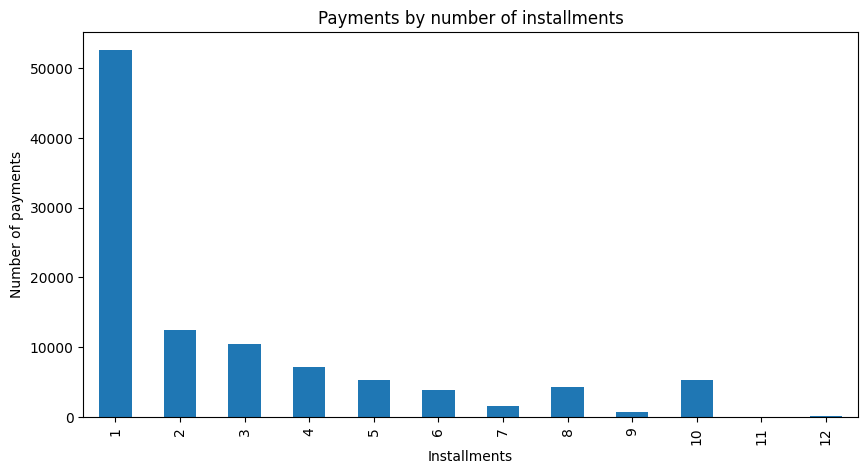

In [33]:
installments = df_payments['payment_installments'].value_counts().sort_index()
installments = installments[installments.index > 0]  

plt.figure(figsize=(10,5))
installments.head(12).plot(kind='bar')
plt.title("Payments by number of installments")
plt.xlabel("Installments")
plt.ylabel("Number of payments")
plt.show()

**Summary (Payments):**  
- Credit card is by far the most common payment method, followed by boleto and voucher.
- Payment values show large variation, from very small to very large amounts.
- Orders often have multiple payments.

## Products analysis

In [34]:
df_products['product_id'].nunique()


32951

In [35]:
df_products['product_category_name'].nunique()

73

In [36]:
df_products['product_category_name'].isna().mean().round(3) 

0.019

In [37]:
df_prod_cat = df_products.merge(df_translations, how='left',
                                left_on='product_category_name', 
                                right_on ='product_category_name')
df_prod_cat['product_category_name_english'].fillna('unknown', inplace=True)

top_cat = df_order_items.merge(df_prod_cat[['product_id','product_category_name_english']],
                               on='product_id', how='left'
) \
.groupby('product_category_name_english')['order_id'] \
.count().sort_values(ascending=False).head(10)

top_cat


product_category_name_english
bed_bath_table           11115
health_beauty             9670
sports_leisure            8641
furniture_decor           8334
computers_accessories     7827
housewares                6964
watches_gifts             5991
telephony                 4545
garden_tools              4347
auto                      4235
Name: order_id, dtype: int64

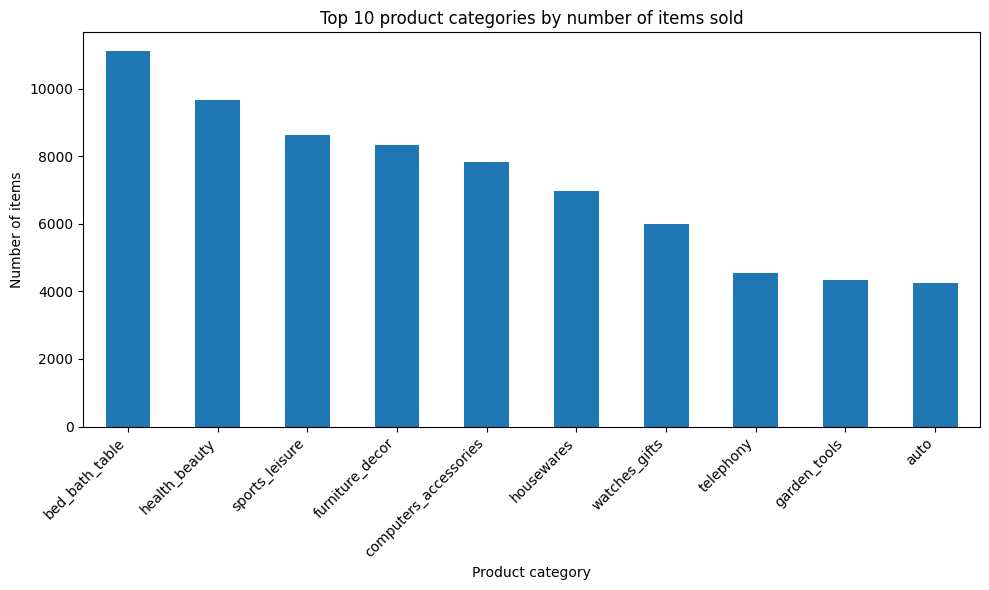

In [38]:
plt.figure(figsize=(10,6))
top_cat.plot(kind='bar')
plt.title("Top 10 product categories by number of items sold")
plt.xlabel("Product category")
plt.ylabel("Number of items")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

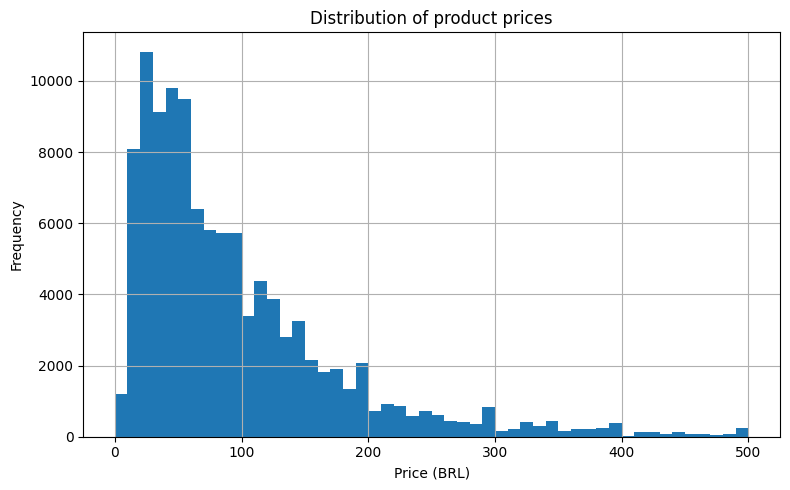

In [39]:
plt.figure(figsize=(8,5))
df_order_items['price'].hist(bins=50, range=(0,500))
plt.title("Distribution of product prices")
plt.xlabel("Price (BRL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

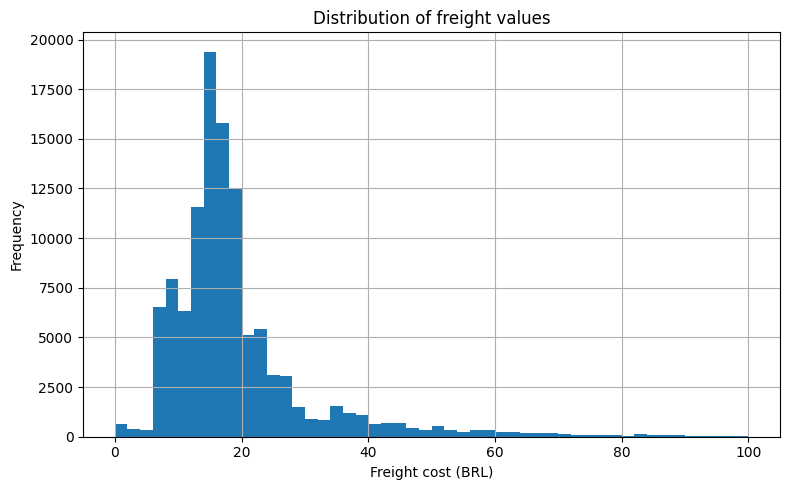

In [40]:
plt.figure(figsize=(8,5))
df_order_items['freight_value'].hist(bins=50, range=(0,100))
plt.title("Distribution of freight values")
plt.xlabel("Freight cost (BRL)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**Summary (Products):**  
- ~33k products across ~70 categories.  
- Not all products have a valid category (some are missing or unknown).  
- Top categories include health_beauty, bed_bath_table, sports_leisure.

## Customers analysis

In [41]:
df_customers['customer_id'].nunique()

99441

In [42]:
df_customers['customer_unique_id'].nunique()

96096

In [43]:
orders_with_unique_id = df_orders.merge(
    df_customers[['customer_id','customer_unique_id']],
    on='customer_id',
    how='left'
)

orders_per_customer = (orders_with_unique_id
                       .groupby('customer_unique_id')['order_id']
                       .nunique())

orders_per_customer.describe().round(3)

count    96096.000
mean         1.035
std          0.214
min          1.000
25%          1.000
50%          1.000
75%          1.000
max         17.000
Name: order_id, dtype: float64

In [44]:
df_customers['customer_state'].value_counts().head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: count, dtype: int64

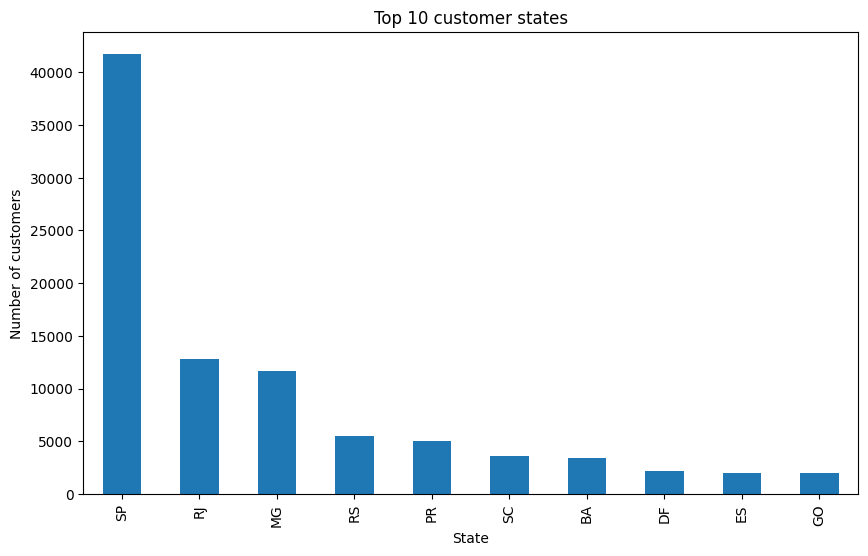

In [45]:
customer_states = df_customers['customer_state'].value_counts().head(10)

plt.figure(figsize=(10,6))
customer_states.plot(kind='bar')
plt.title("Top 10 customer states")
plt.xlabel("State")
plt.ylabel("Number of customers")
plt.show()

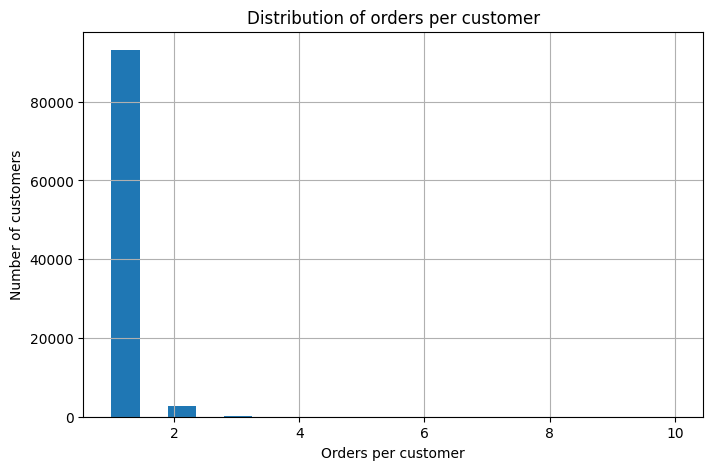

In [54]:
plt.figure(figsize=(8,5))
orders_per_customer.hist(bins=20, range=(1,10))
plt.title("Distribution of orders per customer")
plt.xlabel("Orders per customer")
plt.ylabel("Number of customers")
plt.show()

**Summary (Customers):**  
- There are ~96k unique customers in the dataset.  
- The vast majority placed only one order, with only a small fraction making repeat purchases (max observed = 17 orders).  
- Customers are located across Brazilian states, with the largest share in São Paulo (SP), Rio de Janeiro (RJ), and Minas Gerais (MG).

## Key Insights from EDA

- The dataset covers ~100k orders between 2016–2018.  
- Most orders were delivered, with only a small share canceled or not delivered.  
- Credit cards are the dominant payment method, and some orders are split into installments.  
- There are tens of thousands of products across many categories, but some category values are missing.  
- Customers come from Brazilian states, and most placed only a single order.